# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

> Văn bản được thụt lề



### Step 3. Assign it to a variable called chipo.

In [3]:
github_url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv'

df = pd.read_csv(github_url,sep = '\t')
chipo = df
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

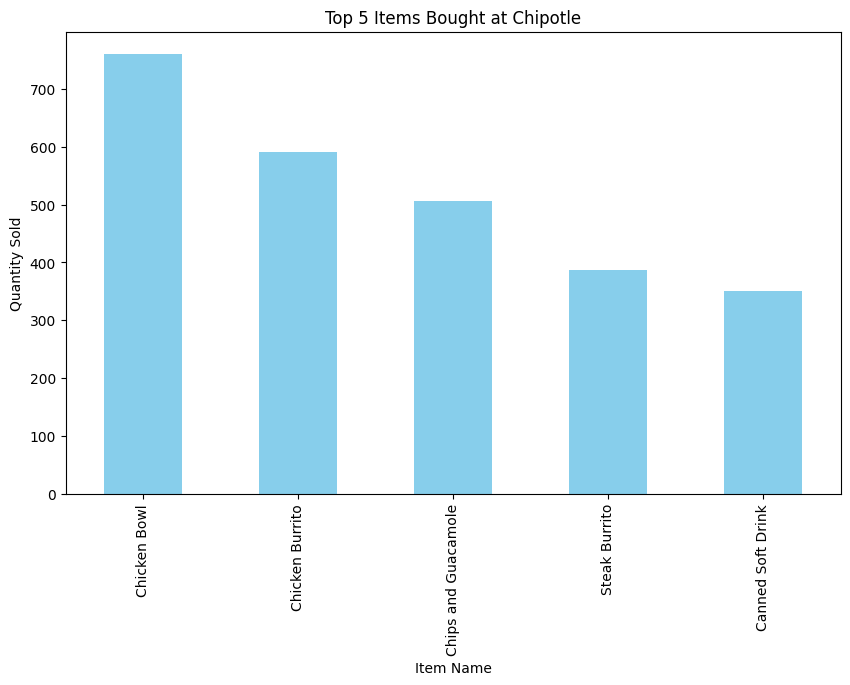

In [6]:
import matplotlib.pyplot as plt
item_quantities = chipo.groupby('item_name')['quantity'].sum()
top_5_items = item_quantities.sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
top_5_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Items Bought at Chipotle')
plt.xlabel('Item Name')
plt.ylabel('Quantity Sold')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

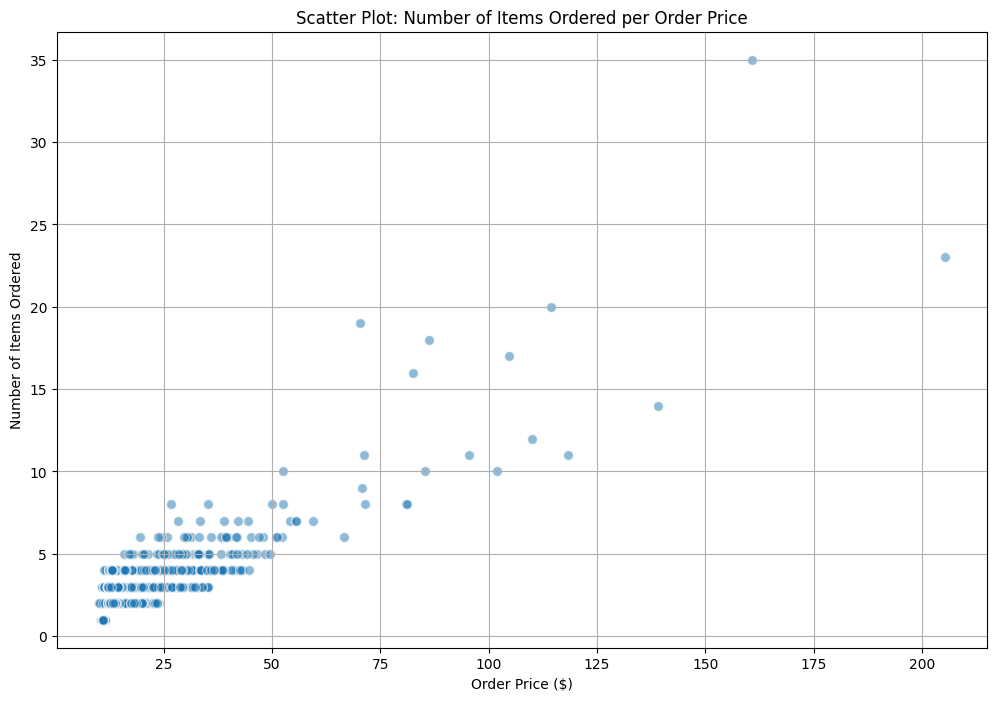

In [7]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
order_totals = chipo.groupby('order_id').agg({'quantity': 'sum', 'item_price': 'sum'})
plt.figure(figsize=(12, 8))
plt.scatter(order_totals['item_price'], order_totals['quantity'], alpha=0.5, edgecolors='w', s=50)
plt.title('Scatter Plot: Number of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.grid(True)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

<ipython-input-8-486fce92ac06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chip_items['item_price'] = chip_items['item_price'].replace('[\$,]', '', regex=True).astype(float)


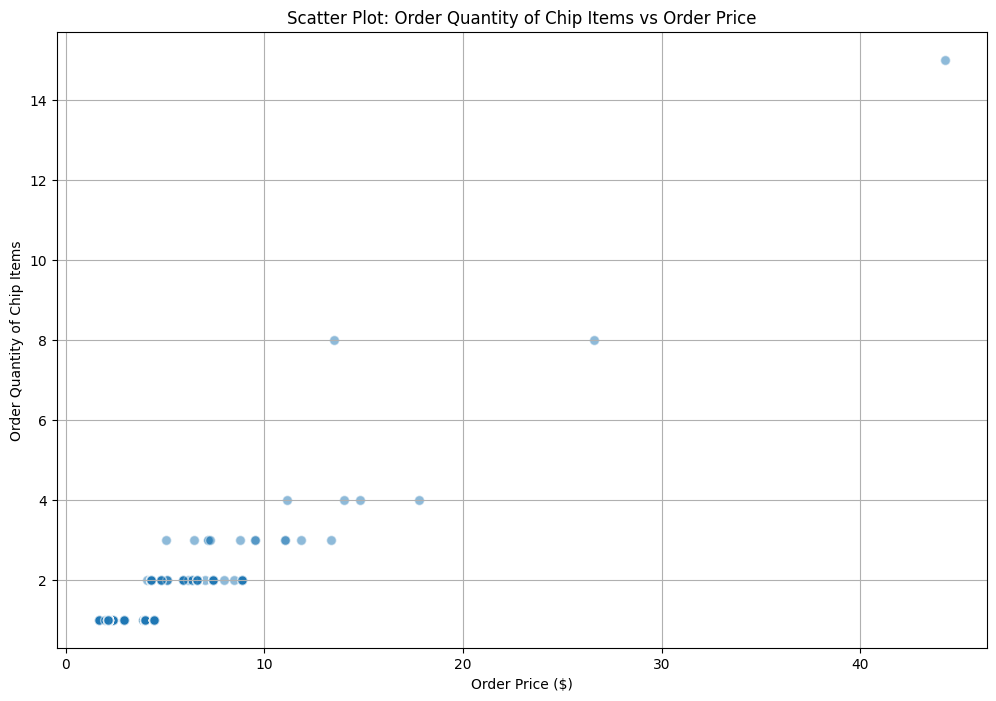

In [8]:
chip_items = chipo[chipo['item_name'].str.contains('Chip')]
chip_items['item_price'] = chip_items['item_price'].replace('[\$,]', '', regex=True).astype(float)
chip_order_totals = chip_items.groupby('order_id').agg({'quantity': 'sum', 'item_price': 'sum'})
plt.figure(figsize=(12, 8))
plt.scatter(chip_order_totals['item_price'], chip_order_totals['quantity'], alpha=0.5, edgecolors='w', s=50)
plt.title('Scatter Plot: Order Quantity of Chip Items vs Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Order Quantity of Chip Items')
plt.grid(True)
plt.show()
